In [1]:
import pandas as pd
import numpy as np

In [2]:
file_k = r"C:\Users\keanu\OneDrive\Dokumente\Python\final_projectSS24_Group2\data\kunden.csv"
file_b = r"C:\Users\keanu\OneDrive\Dokumente\Python\final_projectSS24_Group2\data\besucher.csv"
file_geo = r"C:\Users\keanu\OneDrive\Dokumente\Python\final_projectSS24_Group2\data\geo.txt"

In [3]:
df_k = pd.read_csv(file_k, sep = ";", decimal = ".")
df_b = pd.read_csv(file_b, sep = ";", decimal = ",")
df_geo = pd.read_table(file_geo, delimiter = "\t") #\t muss verwendet werden damit die Spalten der Liste aus der txt Datei separiert werden können

In [4]:
df_geo

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern
...,...,...
1990,K1991,Hessen
1991,K1992,Baden-Württemberg
1992,K1993,Nordrhein-Westfalen
1993,K1994,Berlin


In [5]:
df_b_k = pd.concat([df_b,df_k], ignore_index = True)
df_b_k

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis
0,30,39919.095335,0.0,29.0,K1814,NaN
1,41,53430.673086,0.0,27.0,K1544,NaN
2,64,73163.216927,0.0,32.0,K1945,NaN
3,41,36761.482581,0.0,44.0,K1825,NaN
4,35,42684.331632,1.0,33.0,K1144,NaN
...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58
1991,38,48301.000000,1.0,33.0,K0122,64230.98
1992,67,63547.000000,1.0,41.0,K1045,103123.57
1993,37,32686.000000,1.0,36.0,K1096,49215.87


In [6]:
df_b_k = pd.concat([df_b,df_k], ignore_index = True)
df_b_k

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis
0,30,39919.095335,0.0,29.0,K1814,NaN
1,41,53430.673086,0.0,27.0,K1544,NaN
2,64,73163.216927,0.0,32.0,K1945,NaN
3,41,36761.482581,0.0,44.0,K1825,NaN
4,35,42684.331632,1.0,33.0,K1144,NaN
...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58
1991,38,48301.000000,1.0,33.0,K0122,64230.98
1992,67,63547.000000,1.0,41.0,K1045,103123.57
1993,37,32686.000000,1.0,36.0,K1096,49215.87


In [7]:
df_bkg = pd.merge(df_b_k, df_geo, on = "KundeNr")
df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen
...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg


In [8]:
# Berechnung von Q1 (25. Perzentil), Q3 (75. Perzentil) und IQR
Q1 = df_bkg['Einkommen'].quantile(0.25)
Q3 = df_bkg['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

# Berechnung der Ausreißer-Grenzen
untere_grenze = Q1 - 1.6 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst
obere_grenze = Q3 + 5 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst

# Identifizierung von Ausreißern
df_bkg['Ausreißer'] = (df_bkg['Einkommen'] < untere_grenze) | (df_bkg['Einkommen'] > obere_grenze)

df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern,False
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg,False
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg,False
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg,False
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen,False
...,...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen,False
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen,False
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin,False
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg,False


In [9]:
untere_grenze

9204.719763225141

In [10]:
#Ausreißer bzgl. des Einkommens identifizieren
filtered_df_bkg = df_bkg[df_bkg["Ausreißer"] == True]
filtered_df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
1299,68,1.000000e+09,0.0,52.0,K0701,87209.72,Nordrhein-Westfalen,True
1857,69,0.000000e+00,1.0,65.0,K1021,125140.05,Bayern,True
1973,59,-6.284037e+04,0.0,46.0,K1083,92837.59,Baden-Württemberg,True


In [11]:
#Median des Einkommens bestimmen 
einkommen_medianwert = df_bkg["Einkommen"].median()
einkommen_medianwert 

59104.51301372704

In [12]:
#Überprüfung des Median
Q2 = df_bkg['Einkommen'].quantile(0.5)
Q2

59104.51301372704

In [13]:
#Ersetzen der oberen und unteren Werte
df_bkg.loc[df_bkg["Einkommen"] < untere_grenze, "Einkommen"] = einkommen_medianwert
df_bkg.loc[df_bkg["Einkommen"] > obere_grenze, "Einkommen"] = einkommen_medianwert

In [14]:
df_bkg.iloc[1299]

Alter                             68
Einkommen               59104.513014
Geschlecht                       0.0
Zeit                            52.0
KundeNr                        K0701
Preis                       87209.72
Niederlassung    Nordrhein-Westfalen
Ausreißer                       True
Name: 1299, dtype: object

In [15]:
df_bkg.iloc[1857, 1]

59104.51301372704

In [16]:
#Identifikation fehlender Werte bei Kategorie Geschlecht
geschlecht_NAN = df_bkg[df_bkg["Geschlecht"].isna()]
geschlecht_NAN

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
1001,41,46542.0,NaN,40.0,K0024,63477.00,Baden-Württemberg,False
1203,53,49798.0,NaN,39.0,K0166,61329.51,Nordrhein-Westfalen,False
1479,64,83452.0,NaN,62.0,K0090,133180.70,Niedersachsen,False
1503,52,66602.0,NaN,45.0,K0325,98756.07,Bayern,False
1622,67,91461.0,NaN,66.0,K0790,131748.07,Berlin,False


In [17]:
#Identifikation des Modalwert bei der Kategorie Geschlecht
geschlecht_modalwert = df_bkg["Geschlecht"].mode()[0]
geschlecht_modalwert 

1.0

In [18]:
#Geschlechtswerte ohne Eintrag durch Modalwert ersetzen
df_bkg["Geschlecht"] = df_bkg["Geschlecht"].fillna(geschlecht_modalwert)
df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern,False
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg,False
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg,False
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg,False
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen,False
...,...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen,False
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen,False
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin,False
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg,False


In [19]:
#Identifikation von wahrscheinlich falschen oder gar illegalen Altersangaebn
unglaubwürdiges_alter = df_bkg[(df_bkg["Alter"] > 90) | (df_bkg["Alter"] < 18)]
unglaubwürdiges_alter

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
1033,100,88749.0,0.0,64.0,K0494,119134.23,Bayern,False
1602,120,61857.0,1.0,52.0,K0039,104214.07,Baden-Württemberg,False


In [20]:
#Identifikation des Modalwert bei der Kategorie Alter
alter_medianwert = df_bkg["Alter"].median()
alter_medianwert 

51.0

In [21]:
#Bereinigung Alter und Überprüfung
df_bkg.loc[df_bkg["Alter"] > 90, "Alter"] = alter_medianwert
df_bkg.iloc[1602]

Alter                           51
Einkommen                  61857.0
Geschlecht                     1.0
Zeit                          52.0
KundeNr                      K0039
Preis                    104214.07
Niederlassung    Baden-Württemberg
Ausreißer                    False
Name: 1602, dtype: object

In [22]:
#Definition der Bundesländer
bundesländer = ["Baden-Württemberg", "Bayern", "Berlin", "Brandenburg", "Bremen", "Hamburg", "Hessen",
                "Mecklenburg-Vorpommern", "Niedersachsen", "Nordrhein-Westfalen", "Rheinland-Pfalz", "Saarland",
                "Sachsen", "Sachsen-Anhalt", "Schleswig-Holstein", "Thüringen"]
#Nur jene Einträge für Niederlassungen anzeigen lassen, welche *nicht* in vorheriger Liste vorhanden sind
bundesländer_falsche_namen = df_bkg[~df_bkg["Niederlassung"].isin(bundesländer)]
bundesländer_falsche_namen

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
299,44,54025.601631,1.0,30.0,K1987,NaN,NRW,False
491,49,54754.525450,1.0,44.0,K1995,NaN,Berlin-Charlottenburg,False
587,63,84772.480847,1.0,30.0,K1973,NaN,Düsseldorf,False
840,32,40776.023145,1.0,13.0,K1609,NaN,BERLIN,False
911,43,52813.000000,0.0,44.0,K0762,67106.32,BERLIN,False
1249,61,56063.000000,1.0,44.0,K0679,98148.54,Berlin-Mitte,False
1472,55,66738.000000,1.0,52.0,K0413,120215.50,Düsseldorf,False
1510,62,75575.000000,1.0,50.0,K0023,124516.56,NRW,False
1783,58,65271.000000,1.0,44.0,K0002,106258.99,NRW,False
1812,30,28784.000000,1.0,34.0,K0677,42416.07,Berlin-Mitte,False


In [23]:
#Jetzt ersetzen wir die ungewollten Bezeichnungen der Niederlassungen mit den gewollten Bezeichnungen
#1. den "falschen" Schlüsseln die gewollten Werte zuordnen
ersetzen_dict = {
    "Berlin-Charlottenburg": "Berlin",
    "BERLIN": "Berlin",
    "Berlin-Mitte": "Berlin",
    "Düsseldorf": "Nordrhein-Westfalen",
    "NRW": "Nordrhein-Westfalen",
}
#2. Die geändert Werte jetzt in das Datafram übertragen
df_bkg["Niederlassung"].replace(ersetzen_dict, inplace=True)

In [24]:
#Überprüfung ob korrekt ersetzt wurde (Stichprobe)
df_bkg.iloc[1472, 6]

'Nordrhein-Westfalen'

In [25]:
df_bkg.to_csv("df_final.csv", index=False)

In [26]:
#F1 Wie viele Autos wurden verkauft?
df_preis_vorhanden = df_bkg[df_bkg["Preis"].notna()]
df_autos_verkauft = df_preis_vorhanden["KundeNr"].nunique()
df_autos_verkauft

1104

In [27]:
#F3 Wie hoch ist der Gesamtumsatz?
df_umsatz = df_bkg["Preis"].dropna().sum()
df_umsatz

98228619.38000001

In [28]:
#F2.1 Was ist der Durchschnittspreis der verkauften Autos? (RECHECK)
df_kunden = df_bkg["Preis"].dropna() #Ermittlung der Spalten mit verkauf
df_durchschnittspreis = np.mean(df_kunden)
df_durchschnittspreis

88975.19871376813

In [29]:
#F2.2 Was ist der Höchstpreis der verkauften Autos?
df_höchstpreis = np.max(df_kunden)
df_höchstpreis

165482.31

In [30]:
#F2.3 Was ist der Mindestpreis der verkauften Autos?
df_mindestpreis = np.min(df_kunden)
df_mindestpreis

21471.65

In [31]:
#F4 Wieviele Autos wurden pro Bundesland verkauft?
#Ermittelung der Spalten wo Preis vorhanden ist
df_mit_preis = df_bkg[df_bkg["Preis"].notna()]
#Ermittlung Anzahl pro Bundesland
anzahl_verkauf_pro_land = df_mit_preis.groupby('Niederlassung')['Preis'].count()
anzahl_verkauf_pro_land 

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

In [32]:
#F5 Wie hoch war der durchschnittliche Umsatz pro Bundesland?
#Ermittelung der Spalten wo Preis vorhanden ist
df_mit_preis = df_bkg[df_bkg["Preis"].notna()]
#Ermittlung Durchschnittsumsatz pro Bundesland
durchschnitt_umsatz_pro_land = df_mit_preis.groupby('Niederlassung')['Preis'].mean()
durchschnitt_umsatz_pro_land

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

In [33]:
#F6 In welchem Bundesland wurde das teuerste Auto verkauft?
max_preis_index = df_mit_preis["Preis"].idxmax()
bundesland_teuerstes_auto = df_mit_preis.loc[max_preis_index, "Niederlassung"]
bundesland_teuerstes_auto

'Niedersachsen'

In [34]:
#F8.1 Wie hoch ist das Durchschnittsalter unserer Kunden?
durchschnittsalter_Kunden = df_mit_preis["Alter"].mean()
durchschnittsalter_Kunden


50.375

In [35]:
#F8.2 Wie hoch ist dasDurchschnittsalter unserer Besucher?
#Filtern der Besucher
df_ohne_preis = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittsalter
durchschnittsalter_Besucher = df_ohne_preis["Alter"].mean()
durchschnittsalter_Besucher

49.88103254769921

In [36]:
#F9.1 Wie hoch ist das Durchschnittseinkommen unserer Kunden? 
df_preis_vorhanden["Einkommen"].mean()

58895.24686507354

In [37]:
#F9.2 Wie hoch ist das Durchschnittseinkommen unserer Besucher?
#Ermittlungen der Zeilen mit NAN in der Preis-Spalte
df_preis_nicht_vorhanden = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittseinkommen der Besucher berechenen
df_preis_nicht_vorhanden["Einkommen"].mean()

59367.93618779704

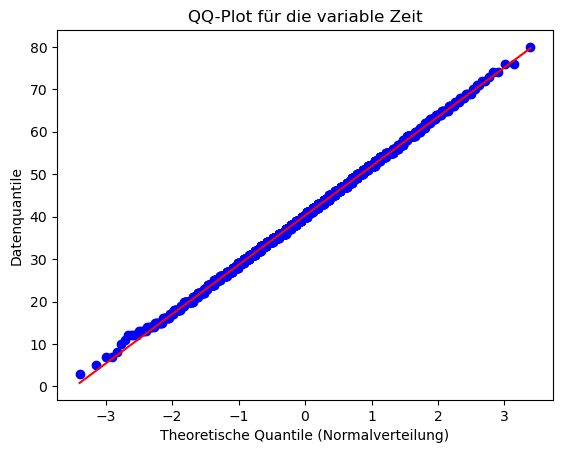

In [38]:
#F12 Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalver- teilt ist.

#import matplotloib und scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

#variable Zeit
zeit = df_bkg["Zeit"]

#QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title("QQ-Plot für die variable Zeit")
plt.xlabel("Theoretische Quantile (Normalverteilung)")
plt.ylabel("Datenquantile")
plt.show()

#Interpretation
#Die Variable Zeit kann als approximativ normalverteilt betrachtet werden

In [39]:
#F14 Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? 
#Wählen Sie die geeigneten unabhängigen Variablen aus und schätzen Sie eine 
#Regression unter Verwendung der geeigneten Methode

#Neuen Dataframe mit relevanten unabhängigen Variablen erstellen
nicht_rel_var = ["KundeNr", "Niederlassung", "Ausreißer", "Preis"]
df_rel_var = df_preis_vorhanden.drop(columns = nicht_rel_var)
df_rel_var.head()


,Alter,Einkommen,Geschlecht,Zeit
891,64,66894.0,1.0,43.0
892,54,77644.0,1.0,40.0
893,55,44341.0,0.0,37.0
894,49,67271.0,0.0,42.0
895,46,49832.0,0.0,41.0


In [41]:
y = df_preis_vorhanden["Preis"]
X = df_rel_var
X = sm.add_constant(X)

NameError: name 'sm' is not defined

In [ ]:
model = sm.OLS(y, X).fit()
model.summary()

In [ ]:

#Schlussfolgerungen:
#Da der P>|t|-Wert bei der Zeit den Wert 0.05 überschreitet, ist die Zeit ein nicht signifikanter Koeffizient. 
#Daher kann nicht gesagt werden, ob die Zeit einen entscheidenden Einfluss auf den Kaufpreis hat. 
#Dahingegen sind Einkommen, Alter und Geschlecht signifikant.

In [ ]:
X

In [ ]:
#F15 Prognose - männlicher Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro
y1 = pd.DataFrame({"Alter" : [32], "Einkommen" : [30000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})

In [ ]:
#y1 = sm.add_constant(y1) funktioniert nicht, weshalb die predict Funktion nicht funktioniert. Ich füge die Konstante manuell hinzu
y1.insert(0, "const", 1)
y1

In [ ]:
Prognose1 = model.predict(y1)
Prognose1

In [ ]:
#F15 Prognose - männlicher Kunden im Alter von 51 Jahren mit einem Einkommen von 54.000 Euro
y2 = pd.DataFrame({"Alter" : [51], "Einkommen" : [54000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})
y2.insert(0, "const", 1)
Prognose2 = model.predict(y2)
Prognose2

In [ ]:
#F16 In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? 
#Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müs- sen direkt vergleichbar sein. 
#Wie sollen die Daten transformiert werden?

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [ ]:
# Überprüfen und Entfernen von Zeilen mit fehlenden Werten in den relevanten Spalten
df_bkg_clean = df_bkg.dropna(subset=["Einkommen", "Alter", "Preis", "Geschlecht", "Zeit"])

# Auswahl der unabhängigen Variablen und der abhängigen Variable
X = df_bkg_clean[["Einkommen", "Alter", "Geschlecht", "Zeit"]]
y = df_bkg_clean["Preis"]

In [ ]:
# Standardisieren der unabhängigen Variablen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konvertiere die standardisierten Variablen zurück in ein DataFrame und füge eine Konstante hinzu
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = sm.add_constant(X_scaled)

# Reset Index für die Standardisierten Variablen und Zielvariable
X_scaled = X_scaled.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
# Regression schätzen (lineare Regression)
model_scaled = sm.OLS(y, X_scaled).fit()

# Zusammenfassung des Modells anzeigen
model_scaled.summary()

In [ ]:
# Erklärung des Ergebnisses:
# Da die variablen standardisiert sind, sind die Koeffizienten direkt vergleichbar. Der größte Koeffizient in der
# absoluten Höhe zeigt die Variable an, die den größten Einfluss auf den Preis des Autos hat.
# den größten Einfluss hat das Einkommen, da hier der Koeffizient 16.920 beträgt, 
# da P = 0 ist der Effekt statistisch signifikant

In [ ]:
# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung der Beziehung zwischen den unabhängigen Variablen und der abhängigen Variable
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatterplots und Regressionslinien')

sns.regplot(ax=axes[0, 0], x=df_bkg_clean["Einkommen"], y=y, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[0, 0].set_title("Einkommen vs. Preis")

sns.regplot(ax=axes[0, 1], x=df_bkg_clean["Alter"], y=y, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[0, 1].set_title("Alter vs. Preis")

sns.regplot(ax=axes[1, 0], x=df_bkg_clean["Geschlecht"], y=y, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[1, 0].set_title("Geschlecht vs. Preis")

sns.regplot(ax=axes[1, 1], x=df_bkg_clean["Zeit"], y=y, scatter_kws={"s": 10}, line_kws={"color": "red"})
axes[1, 1].set_title("Zeit vs. Preis")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Residuen plotten
plt.figure(figsize=(10, 6))
sns.histplot(model_scaled.resid, kde=True)
plt.title("Verteilung der Residuen")
plt.xlabel("Residuen")
plt.ylabel("Häufigkeit")
plt.show()

# QQ-Plot der Residuen
sm.qqplot(model_scaled.resid, line ='45')
plt.title("QQ-Plot der Residuen")
plt.show()

In [ ]:
#F17 Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. 
# Verwenden Sie die entsprechende Methode.

In [ ]:
#Zielvariable "Preis" binärisieren: 1 für Kauf, 0 für keinen Kauf (NaN)
df_bkg['Preis'] = df_bkg['Preis'].notna().astype(int)


# Überprüfen und Entfernen von Zeilen mit fehlenden Werten in den relevanten Spalten
df_bkg_clean = df_bkg.dropna(subset=["Einkommen", "Alter", "Geschlecht", "Zeit", "Preis"])  # 'Preis' ist die binäre Zielvariable

In [ ]:
# Auswahl der unabhängigen Variablen und der abhängigen Variable
X = df_bkg_clean[["Einkommen", "Alter", "Geschlecht", "Zeit"]]
y = df_bkg_clean["Preis"].astype(int)  # 'Preis' sollte eine binäre Variable sein (z.B. 1 für Kauf und 0 für Nicht-Kauf)

# Indizes zurücksetzen
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
# Standardisieren der unabhängigen Variablen

from sklearn.preprocessing import StandardScaler

# Standardisieren der unabhängigen Variablen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konvertiere die standardisierten Variablen zurück in ein DataFrame und füge eine Konstante hinzu
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = sm.add_constant(X_scaled)

In [ ]:
#Logistische Regression durchführen

import statsmodels.api as sm

# Logistische Regression schätzen
logit_model = sm.Logit(y, X_scaled).fit()

# Zusammenfassung des Modells anzeigen
logit_model.summary()

In [ ]:
# Die logistische Regression zeigt, dass die Wahrscheinlichkeit eines Autokaufs am stärksten durch die Zeit beeinflusst wird, 
# die der Kunde mit dem Testen des Autos verbringt. Einkommen hat einen negativen Einfluss, während Alter und 
# Geschlecht (männlich) positive Einflüsse haben. Diese Erkenntnisse können genutzt werden, um gezielte Marketingstrategien 
# und Verkaufsansätze zu entwickeln, die die Kaufwahrscheinlichkeit erhöhen.

In [ ]:
#F18.1 Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, 
# eines unserer Modelle kauft? 
#F18.2 Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, 
# eines unserer Modelle kauft?

In [ ]:
# Koeffizienten der logistischen Regression aus F17
intercept = 0.2377
coef_einkommen = -0.6888
coef_alter = 0.2148
coef_geschlecht = 0.1202
coef_zeit = 1.1874

In [ ]:
# Funktion zur Berechnung der Wahrscheinlichkeit
#def kaufwahrscheinlichkeit(einkommen, alter, geschlecht, zeit):
   # logit_p = (intercept +
         #      coef_einkommen * einkommen / + #Einkommen skalieren (overflow error)
      #         coef_alter * alter +
    # #          coef_geschlecht * geschlecht +
  #             coef_zeit * zeit)
   # return 1 / (1 + np.exp(-logit_p))

In [ ]:

# Logistische Funktion ohne Überlauf
def logistic_function(x):
    return np.exp(x) / (1 + np.exp(x))

In [ ]:
# Funktion zur Berechnung der Wahrscheinlichkeit
def kaufwahrscheinlichkeit(einkommen, alter, geschlecht, zeit):
    x = np.array([1, einkommen / 10000, alter / 10, geschlecht, zeit / 10])
    logit_p = np.dot([intercept, coef_einkommen, coef_alter, coef_geschlecht, coef_zeit], x)
    logit_p = np.clip(logit_p, -709, 709)
    return logistic_function(logit_p)

In [ ]:
#F18.1
wahrscheinlichkeit1 = kaufwahrscheinlichkeit(30000, 32, 1, 30)
f"Wahrscheinlichkeit für Szenario 1: {wahrscheinlichkeit1:.4f}"


In [ ]:
#F18.2
wahrscheinlichkeit2 = kaufwahrscheinlichkeit(54000, 51, 1, 45)
print(f"Wahrscheinlichkeit für Szenario 2: {wahrscheinlichkeit2:.4f}")